In [1]:
# Load packages 
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Phone number

In [2]:
original_number = c("(541) 471 3918",
              "(603)281-0308",
               "(814)-462-8074",
               "9704443106")
phone = as.data.frame(original_number)
phone

original_number
(541) 471 3918
(603)281-0308
(814)-462-8074
9704443106


In [3]:
# Define phone pattern 
phone_pattern = ".?(\\d{3}).*(\\d{3}).*(\\d{4})"

# Match phone pattern to string 
phone$area_code = str_match(phone$original_number, phone_pattern)[, 2]
phone$exchange = str_match(phone$original_number, phone_pattern)[, 3]
phone$line_number = str_match(phone$original_number, phone_pattern)[, 4]

# View data frame 
phone

original_number,area_code,exchange,line_number
(541) 471 3918,541,471,3918
(603)281-0308,603,281,0308
(814)-462-8074,814,462,8074
9704443106,970,444,3106


# Date 

In [4]:
# Dates with consistent delimiter "-"
original_date = c('20-02-2019', '15-07-2020', '14-09-2021')
date = as.data.frame(original_date)
date

original_date
20-02-2019
15-07-2020
14-09-2021


If dates had consistent delimiter, an alternative to regex is to use the strsplit function which splits the string based on a single delimiter as illustrated below.

In [5]:
# Create new columns for day, month and year using strsplit function 
date$day = sapply(strsplit(as.character(date$original_date), split = "-"), "[", 1)
date$month = sapply(strsplit(as.character(date$original_date), split = "-"), "[", 2)
date$year = sapply(strsplit(as.character(date$original_date), split = "-"), "[", 3)

# View date data frame
date

original_date,day,month,year
20-02-2019,20,02,2019
15-07-2020,15,07,2020
14-09-2021,14,09,2021


But what happens when the delimiter becomes inconsistent? We would need regex to account for the variety of special characters being used here and only capture the digit characters. 

In [6]:
original_date = c('20-02-2019', '15/07/2020', '14.09.2021')
date = as.data.frame(original_date)
date

original_date
20-02-2019
15/07/2020
14.09.2021


In [7]:
# Define date pattern 
date_pattern = "(\\d{2}).(\\d{2}).(\\d{4})"

# Create new columns for day, month and year 
date$day = str_match(date$original_date, date_pattern)[, 2]
date$month = str_match(date$original_date, date_pattern)[, 3]
date$year = str_match(date$original_date, date_pattern)[, 4]

# View date data frame
date

original_date,day,month,year
20-02-2019,20,02,2019
15/07/2020,15,07,2020
14.09.2021,14,09,2021


# Names

In [8]:
full_name = c("Smith, Mr. John", "Davis, Ms Nicole", "Robinson, Mrs. Rebecca", "Armstrong, Dr Sam", "Downey, Mr. Robert")
names = as.data.frame(full_name)
names

full_name
"Smith, Mr. John"
"Davis, Ms Nicole"
"Robinson, Mrs. Rebecca"
"Armstrong, Dr Sam"
"Downey, Mr. Robert"


In [9]:
# Create name pattern 
name_pattern = "(\\w+),\\s(Mr|Ms|Mrs|Dr).?\\s(\\w+)"

# Match name pattern to retrieve full name, title and given name
names$family_name = str_match(names$full_name, name_pattern)[, 2]
names$title = str_match(names$full_name, name_pattern)[, 3]
names$given_name = str_match(names$full_name, name_pattern)[, 4]

# View name data frame 
names

full_name,family_name,title,given_name
"Smith, Mr. John",Smith,Mr,John
"Davis, Ms Nicole",Davis,Ms,Nicole
"Robinson, Mrs. Rebecca",Robinson,Mrs,Rebecca
"Armstrong, Dr Sam",Armstrong,Dr,Sam
"Downey, Mr. Robert",Downey,Mr,Robert


We can also use regex to filter rows in the data frame. For instance, here only want to see rows where given name begins with the letter 'R' using two different functions: grepl and startsWith. 

In [10]:
# grepl function 
names %>% filter(grepl("^R.*", given_name))

full_name,family_name,title,given_name
"Robinson, Mrs. Rebecca",Robinson,Mrs,Rebecca
"Downey, Mr. Robert",Downey,Mr,Robert


In [11]:
# startsWith function 
names[startsWith(names$given_name, "R"), ]

,full_name,family_name,title,given_name
3,"Robinson, Mrs. Rebecca",Robinson,Mrs,Rebecca
5,"Downey, Mr. Robert",Downey,Mr,Robert


# URL

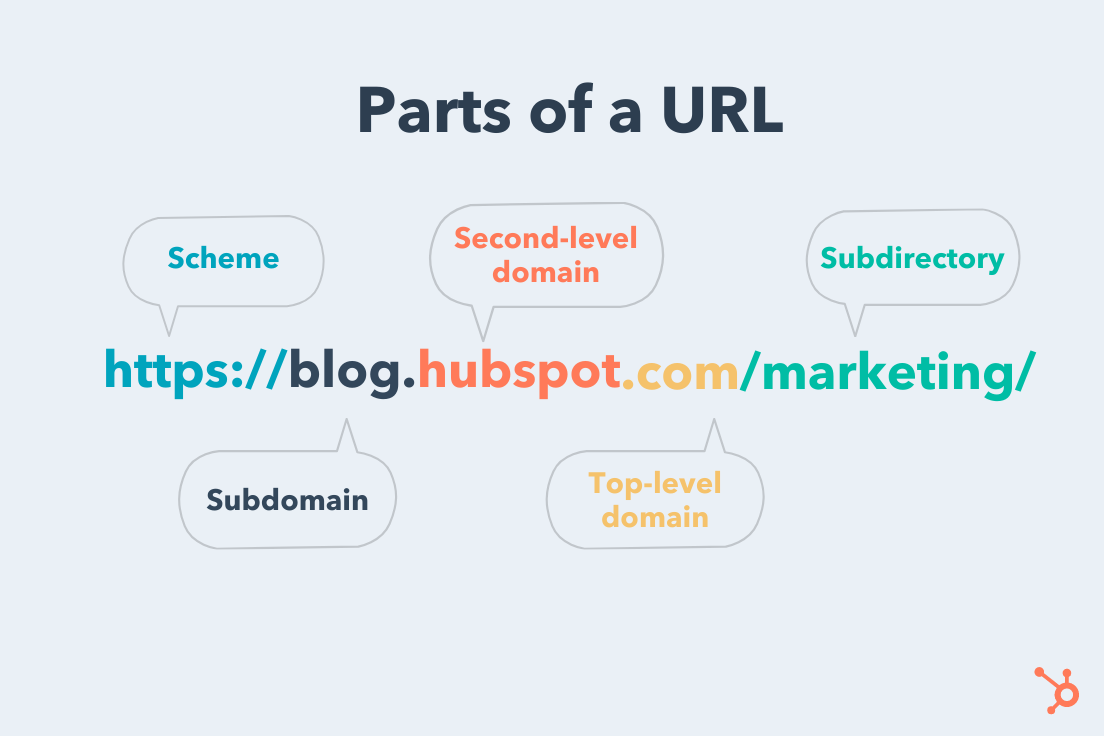

In [12]:
full_url = c("https://www.google.com/gmail",
            "http://www.medium.com", 
            "https://twitter.com/home")
url = as.data.frame(full_url)
url

full_url
https://www.google.com/gmail
http://www.medium.com
https://twitter.com/home


In [13]:
# Define URL pattern 
url_pattern = "(https?)://(www)?.?(\\w+).(\\w+)/?(\\w+)?"

# Match URL pattern 
url$schema = str_match(url$full_url, url_pattern)[, 2]
url$subdomain = str_match(url$full_url, url_pattern)[, 3]
url$second_level_domain = str_match(url$full_url, url_pattern)[, 4]
url$top_level_domain = str_match(url$full_url, url_pattern)[, 5]
url$subdirectory = str_match(url$full_url, url_pattern)[, 6]

# View URL data frame 
url

full_url,schema,subdomain,second_level_domain,top_level_domain,subdirectory
https://www.google.com/gmail,https,www,google,com,gmail
http://www.medium.com,http,www,medium,com,NA
https://twitter.com/home,https,NA,witter,com,home


# Email address

In [14]:
full_email = c("jasonchong_98@hotmail.com", 
              "jason-chong-14@unimelb.edu.au",
              "Jason.Chong@quantium.com.au")
email = as.data.frame(full_email)
email

full_email
jasonchong_98@hotmail.com
jason-chong-14@unimelb.edu.au
Jason.Chong@quantium.com.au


In [15]:
# Define email pattern 
email_pattern = "([a-zA-Z0-9\\_\\-\\.]+)@([a-zA-Z]+).(.+)"

# Match email pattern and create new columns for username, domain name and domain 
email$username = str_match(email$full_email, email_pattern)[, 2]
email$domain_name = str_match(email$full_email, email_pattern)[, 3]
email$domain = str_match(email$full_email, email_pattern)[, 4]

# View email data frame 
email

full_email,username,domain_name,domain
jasonchong_98@hotmail.com,jasonchong_98,hotmail,com
jason-chong-14@unimelb.edu.au,jason-chong-14,unimelb,edu.au
Jason.Chong@quantium.com.au,Jason.Chong,quantium,com.au


# Address

In [16]:
full_address = c("21 Bungana Drive, Kybunga SA 5453", 
                "Thomas Lane, Fitzroy North VIC 3068",
                "107 Quayside Vista, Kingston ACT 2604",
                "94 Prince Street, Lower Coldstream NSW 2460", 
                "George Street, Brisbane QLD 4000")
address = as.data.frame(full_address)
address

full_address
"21 Bungana Drive, Kybunga SA 5453"
"Thomas Lane, Fitzroy North VIC 3068"
"107 Quayside Vista, Kingston ACT 2604"
"94 Prince Street, Lower Coldstream NSW 2460"
"George Street, Brisbane QLD 4000"


In [17]:
# Define address pattern 
address_pattern = "(\\d*)\\s?(.+),\\s(.+)\\s([A-Z]{2,3})\\s(\\d{4})"

# Match address pattern 
address$house_number = str_match(address$full_address, address_pattern)[, 2]
address$street_name = str_match(address$full_address, address_pattern)[, 3]
address$suburb = str_match(address$full_address, address_pattern)[, 4]
address$state = str_match(address$full_address, address_pattern)[, 5]
address$postcode = str_match(address$full_address, address_pattern)[, 6]

# View address data frame 
address

full_address,house_number,street_name,suburb,state,postcode
"21 Bungana Drive, Kybunga SA 5453",21,Bungana Drive,Kybunga,SA,5453
"Thomas Lane, Fitzroy North VIC 3068",,Thomas Lane,Fitzroy North,VIC,3068
"107 Quayside Vista, Kingston ACT 2604",107,Quayside Vista,Kingston,ACT,2604
"94 Prince Street, Lower Coldstream NSW 2460",94,Prince Street,Lower Coldstream,NSW,2460
"George Street, Brisbane QLD 4000",,George Street,Brisbane,QLD,4000
